In [138]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [139]:
iris= load_iris()


In [140]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [141]:
data = pd.DataFrame(iris.data,columns = iris.feature_names)

In [142]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [143]:
data['target'] = iris.target
data.tail(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


In [144]:
data.shape


# 0-50 setosa
# 50-100 versica
# 100-150 are verginica

(150, 5)

In [145]:
df0 = data[:50]
df1 = data[50:100]
df2 = data[100:]

Text(0.5, 1.0, 'Sepal length vs Sepal Width for Setosa and versicolor')

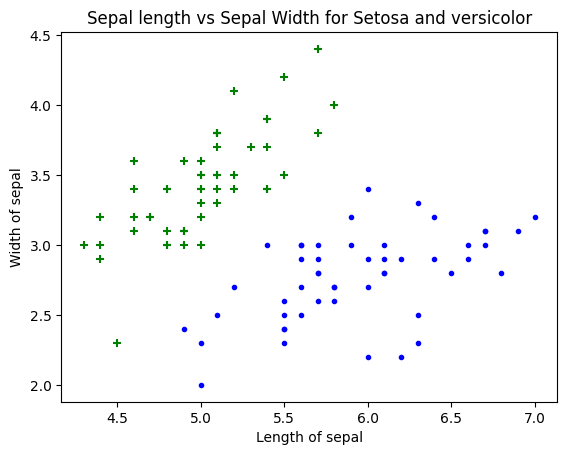

In [146]:
import matplotlib.pyplot as plt







# scatter plot these now for sepal

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],
            color='green', marker="+")
plt.scatter(df1['sepal length (cm)'],
            df1['sepal width (cm)'], color='blue', marker=".")

plt.xlabel("Length of sepal")
plt.ylabel("Width of sepal")
plt.title("Sepal length vs Sepal Width for Setosa and versicolor")

In [147]:
data['flower_name'] = data.target.apply(lambda x:iris.target_names[x] )
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [148]:
#lets sp[plit]

from sklearn.model_selection import train_test_split

X= data.drop(['flower_name','target'],axis='columns')
y= data.target

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2, random_state=42)

In [149]:
X_train.shape

(120, 4)

In [150]:
X_test.shape

(30, 4)

In [151]:
#create KNN classifiers
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 10, metric='minkowski')

#minkowski is the disctance metric to use for the tree. 
#use standard eucledian distance for calcu;lation distabce betn points



In [152]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [153]:
knn.score(X_test,y_test)

1.0

In [154]:
#letsseeconfusionmatrix
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)

Text(50.722222222222214, 0.5, 'Truth')

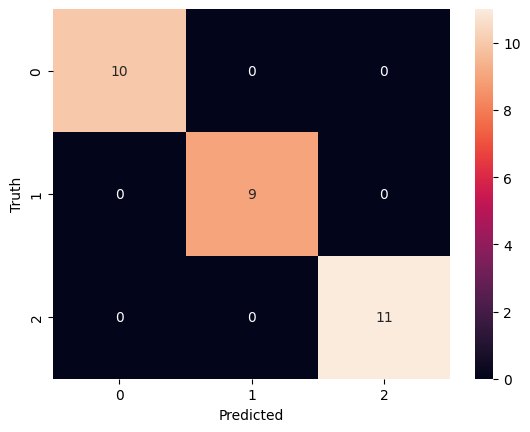

In [157]:
cm= confusion_matrix(y_predicted,y_test)


import seaborn as sb 
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [158]:
#classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

